In [3]:
import pandas as pd
fonte = "../dados/A160324189_28_143_208.csv"

dados = pd.read_csv(fonte,encoding="latin1",skiprows=3,sep=";",decimal=",",skipfooter=12)
pd.options.display.float_format = "{:.2f}".format
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [7]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total",axis=1)
#Removendo as colunas antes de FEV/2008
dados_traspostos = usaveis.T[6:]
usaveis = dados_traspostos.T
usaveis.head()


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


# Desafio 1 - Escolher uma palete de cores mais adequada do matplotlib.

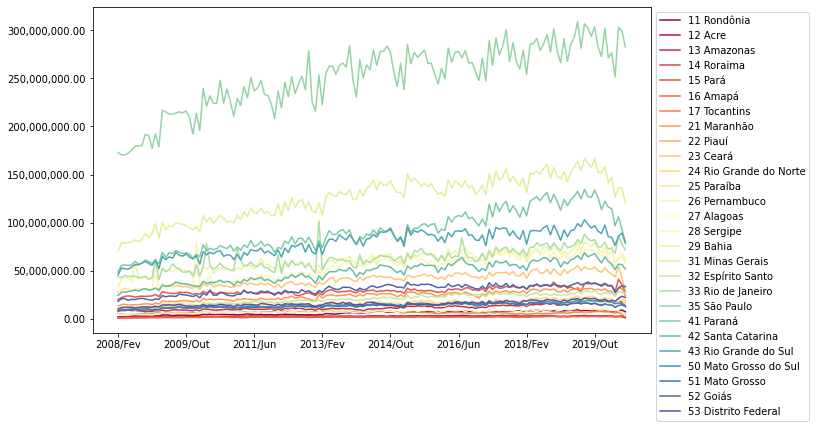

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np

cmap = cm.get_cmap("Spectral")
ax = usaveis.T.plot(figsize=(10,6),colormap=cmap)
ax.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Desafio 2 - Escolher uma palete de cores mais adequada do matplotlib.

In [9]:
usaveis_regiao = usaveis
usaveis_regiao.loc[usaveis_regiao.index.str.startswith("1"),"Região"] = "Norte"
usaveis_regiao.loc[usaveis_regiao.index.str.startswith("2"),"Região"] = "Nordeste"
usaveis_regiao.loc[usaveis_regiao.index.str.startswith("3"),"Região"] = "Sudeste"
usaveis_regiao.loc[usaveis_regiao.index.str.startswith("4"),"Região"] = "Sul"
usaveis_regiao.loc[usaveis_regiao.index.str.startswith("5"),"Região"] = "Centro-Oeste"
usaveis_regiao.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,Norte
15 Pará,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,23537613.41,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,Norte


In [10]:
usaveis["total"] = usaveis.sum(axis=1)
ordenado_por_valor = usaveis.sort_values("total",ascending=False)
ordenado_por_valor = ordenado_por_valor.drop("total",axis=1)
ordenado_por_valor = ordenado_por_valor.drop("Região",axis=1)

coluna_interessadas = ordenado_por_valor.columns
ordenado_por_valor = ordenado_por_valor[coluna_interessadas]
ordenado_por_valor[:5]

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,...,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,...,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
33 Rio de Janeiro,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,...,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33


# Desafio 3 - Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

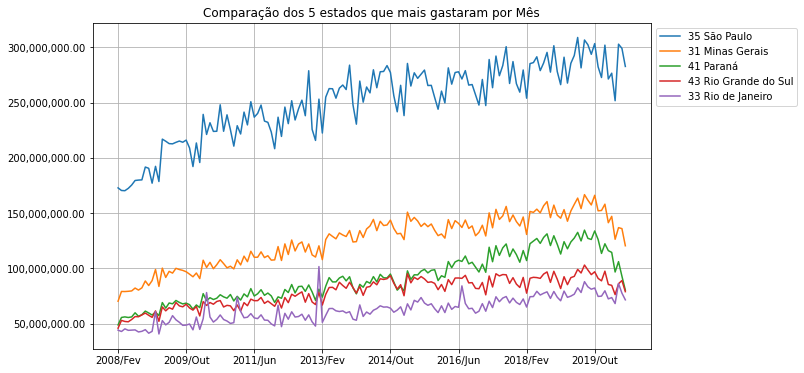

In [11]:
ax = ordenado_por_valor[:5].T.plot(figsize=(10,6),grid=True)
ax.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Comparação dos 5 estados que mais gastaram por Mês")
plt.show()

# Desafio 4 - Adicione o seu estado aos 5 estados plotados anteriormente

In [15]:
ordenado_por_valor_transposto = ordenado_por_valor[:5].T
colunas_estados = ordenado_por_valor_transposto.columns
colunas_estados = colunas_estados.insert(0,"13 Amazonas")
ordenado_por_valor.T[colunas_estados]

Unidade da Federação,13 Amazonas,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro
2008/Fev,7934652.10,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19
2008/Mar,8641517.13,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52
2008/Abr,8531576.49,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86
2008/Mai,9079902.15,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46
2008/Jun,8646295.77,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77
...,...,...,...,...,...,...
2020/Mar,14773739.41,276606288.92,147078556.29,114476997.52,84651396.59,73594497.93
2020/Abr,16330913.81,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35
2020/Mai,19441150.53,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16
2020/Jun,17509334.66,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21


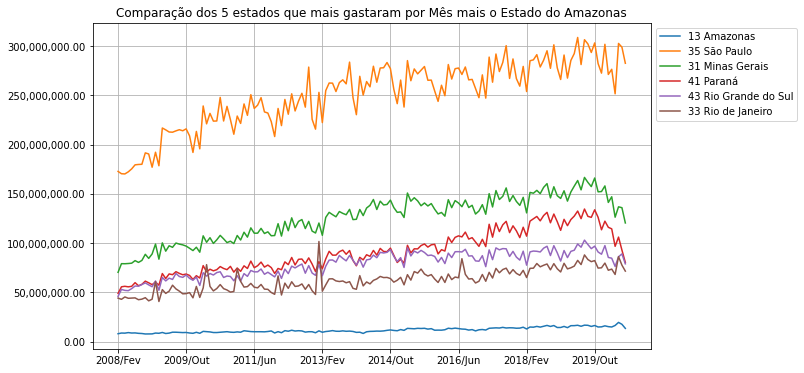

In [16]:
ax = ordenado_por_valor.T[colunas_estados].plot(figsize=(10,6),grid=True)
ax.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Comparação dos 5 estados que mais gastaram por Mês mais o Estado do Amazonas")
plt.show()

# Desafio 5 - Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Removendo as colunas Total e Regiao e deixando o dataframe de FEV/2008 as FEV/2020 e dirando a referencia de ano para agrupar os valores por mês

In [17]:

usaveis_transpostos = usaveis.T[:145]
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Jan"),"Mes"] = "Jan"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Fev"),"Mes"] = "Fev"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Mar"),"Mes"] = "Mar"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Abr"),"Mes"] = "Abr"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Mai"),"Mes"] = "Mai"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Jun"),"Mes"] = "Jun"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Jul"),"Mes"] = "Jul"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Ago"),"Mes"] = "Ago"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Set"),"Mes"] = "Set"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Out"),"Mes"] = "Out"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Nov"),"Mes"] = "Nov"
usaveis_transpostos.loc[usaveis_transpostos.index.str.endswith("Dez"),"Mes"] = "Dez"
usaveis_transpostos = usaveis_transpostos.set_index("Mes")
usaveis_transpostos.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
Mes,,,,,,,,,,,,,,,,,,,,,
Fev,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,27643304.86,...,10032886.43,44122593.19,172834914.73,48855046.46,24409572.92,45897704.82,8279288.79,7929894.93,18149374.27,10215956.80
Mar,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,30085370.22,...,12262049.08,42892665.52,170481849.56,55611791.07,27483480.50,52928695.92,9793888.78,9416367.68,20992213.03,11627918.26
Abr,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,31376221.00,...,12453466.98,45295962.86,170278285.95,56115135.82,27806641.44,51972416.77,8997542.75,9390588.03,21049477.30,11922015.36
Mai,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,31189904.62,...,11789786.09,43951349.46,172402180.59,55574831.93,28354279.52,51679350.79,9842108.59,9378197.25,19162546.79,11900817.00
Jun,2624542.97,2112576.82,8646295.77,938293.54,23502915.90,1420892.01,5398413.09,14553978.06,10465088.93,29463965.11,...,11889687.35,44102925.77,175416595.83,56094754.74,28993292.76,53759674.01,10257782.00,9450300.60,20332533.92,11969271.76


Fiz a média dos meses: Ex: Soma de todos FEV de 2008 a 2020 / 12 anos, fiz a média de forma manual pq o mean() não funcionou no groupby. 

In [18]:

meses_agrupados = usaveis_transpostos.groupby("Mes").sum()/12
meses_agrupados

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
Mes,,,,,,,,,,,,,,,,,,,,,
Abr,6097964.12,2794371.44,11600798.15,1863029.78,29002550.45,1964821.20,6781506.18,23942701.44,14025989.63,41290494.72,...,19839143.26,62117481.76,246885719.73,89193893.74,47030927.06,76809970.09,14017702.15,13538347.01,30269129.38,16031218.41
Ago,6224432.75,2822580.78,11833193.88,2158106.13,29673549.25,1987465.26,6750126.05,24623943.34,14278352.40,42161848.26,...,21523349.58,64012115.20,261989326.60,95153370.92,50318702.94,82823552.02,14896304.27,13896710.15,31909624.95,16594182.36
Dez,5951458.50,2667690.71,10809791.15,1962807.40,28157742.85,1729569.93,6445993.52,22079242.33,13110505.20,38596913.97,...,19831039.21,56963980.51,230515901.40,83896123.38,43880782.07,73921352.20,13349629.38,12450119.40,28565402.76,14608597.03
Fev,6120660.98,2763848.23,11485229.54,1913044.99,29333623.27,1910116.43,6658492.98,23855105.60,14028120.33,40863496.98,...,20313880.00,61311729.21,249112955.15,90053675.68,47027853.36,75148579.69,14280403.51,13240691.27,30349883.01,15857400.14
Jan,6051281.72,2823418.80,11659897.04,2041236.38,29827835.97,1925262.88,6536730.94,24626119.40,14492938.25,41714857.87,...,20587908.08,71428275.05,255314835.32,90522518.54,47788682.75,80597117.72,14377360.88,13339804.72,30417890.83,15912390.62
Jul,6158164.55,2914712.08,11817040.43,2021838.91,28697051.20,1928959.65,6545433.79,24101779.85,14074902.83,41430204.62,...,21223086.41,65519932.32,255506638.60,94604846.04,51151407.56,83108400.82,14734679.42,13858773.92,29998832.47,15766020.81
Jun,6009016.07,2862120.51,11621373.29,2027935.09,28286915.55,1942304.85,6668040.45,23315724.83,13955951.75,40575995.71,...,20069863.05,62286573.72,248746760.18,90407976.77,48787681.65,79759370.10,14461589.35,13450436.83,29876020.34,15909928.06
Mai,6363975.76,2940714.25,11910823.96,2016969.64,29808863.92,1941138.40,6925779.52,24689329.24,14610529.07,42769161.13,...,21155865.99,64121325.94,259034107.52,93780048.48,49142512.79,81145211.08,14916766.89,14141929.32,31308521.87,16222011.37
Mar,6211112.33,2852825.57,11790282.07,1919629.44,29897361.48,1928223.75,6845989.34,24398357.68,14349327.22,41303102.48,...,20867618.41,61580975.96,254984936.95,91757992.29,47765718.93,79247929.16,14694718.92,14075772.90,31311548.95,16446513.90


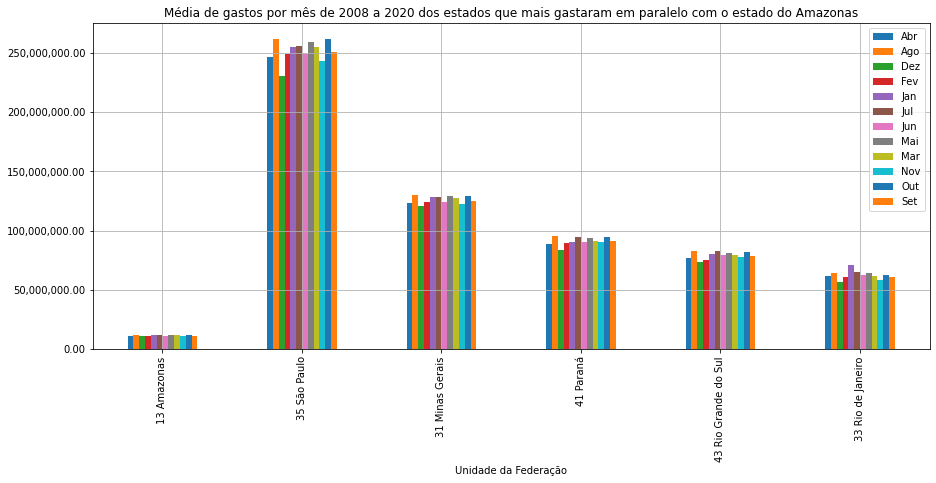

In [19]:
ax = meses_agrupados[colunas_estados].T.plot(figsize=(15,6),grid=True,kind="bar")
ax.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Média de gastos por mês de 2008 a 2020 dos estados que mais gastaram em paralelo com o estado do Amazonas")
plt.show()

Conforme pesquisas abaixo foi observado que o período do mês com mais incidência de dengue é em Abril e Maio, portanto fiz uma média de total de internação por mês no período de 2008 e 2020 e podemos observar que os picos observados no mês de FEV aparentemente não reflete aos casos de dengue.

Material que fala sobre a incidências de dengue nas estações do ano no Brasil http://www.de.ufpb.br/~ronei/CBPAS05_estacoes.pdf http://www.eliminatedengue.com/brasil/noticias/view/news/1069/pg/3 http://www.blog.saude.gov.br/index.php/materias-especiais/51385-luta-o-ano-inteiro-aedes-aegypti-se-prolifera-ate-mesmo-no-inverno http://g1.globo.com/jornal-hoje/noticia/2015/04/abril-e-o-mes-com-maior-numero-de-casos-de-dengue.html https://diariodonordeste.verdesmares.com.br/metro/abril-e-maio-sao-meses-mais-criticos-para-arboviroses-1.1917206

Informação dos estados que mais concentram casos de dengue no Brasil https://www.paho.org/bra/index.php?option=com_content&view=article&id=1050:cinco-estados-concentram-70percent-dos-casos-de-dengue-neste-ano&Itemid=463

# Desafio 6 - Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [20]:
usaveis_regiao_sudeste = usaveis.query("Região == 'Sudeste'")
campos_2013 = ["2012/Dez","2013/Jan","2013/Fev","2013/Mar","2013/Abr"]

usaveis_regiao_sudeste = usaveis_regiao_sudeste[campos_2013]
usaveis_regiao_sudeste

,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr
Unidade da Federação,,,,,
31 Minas Gerais,110269165.40,120408181.68,107894647.44,126117866.62,131252895.30
32 Espírito Santo,18264308.06,19123320.52,17941358.17,19869295.44,19890295.23
33 Rio de Janeiro,47807776.69,101639542.67,51149155.06,57518964.22,63649897.51
35 São Paulo,215780410.93,253136778.93,222449529.20,254938242.41,262649865.82


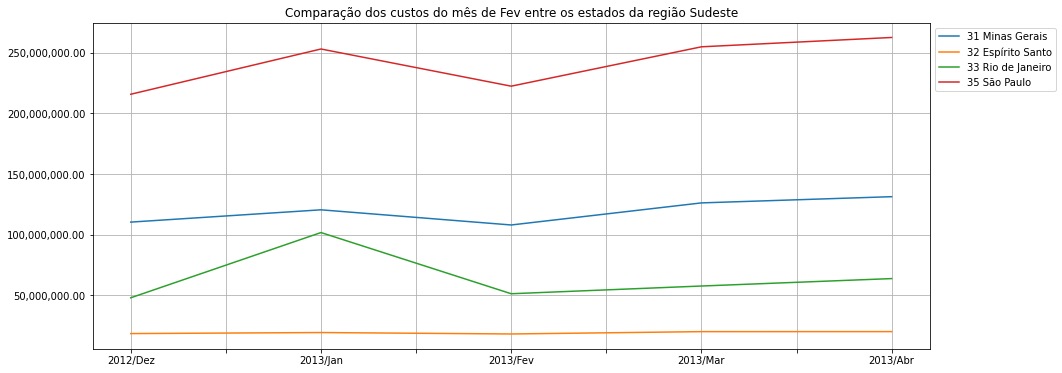

In [22]:
ax = usaveis_regiao_sudeste.T.plot(figsize=(15,6),grid=True)
ax.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Comparação dos custos do mês de Fev entre os estados da região Sudeste")
plt.show()

Podemos observar que com exceção do estado do Espírito Santo, todos os estados tiverem um declínio nos gastos hospitalares no mês de Fev/2013

# Desafio 7 - Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

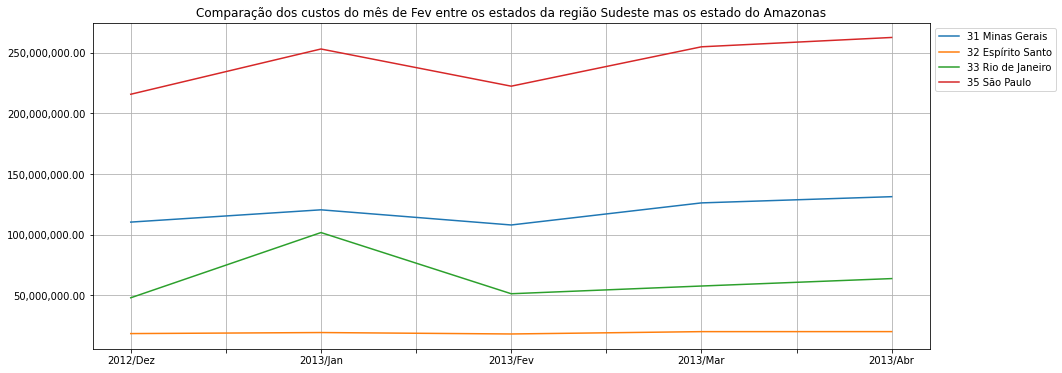

In [23]:
ax = usaveis_regiao_sudeste.T.plot(figsize=(15,6),grid=True)
ax.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Comparação dos custos do mês de Fev entre os estados da região Sudeste mas os estado do Amazonas")
plt.show()

Podemos observar no gráfico que entre os estados do Sudeste existe um pico no mês de JAN/2013 para os estados do Rio de Janeiro, São Paulo e levemente no estado de Minas, o que não acontece com o estado de Espírito Santo e São Paulo, não consigo identificar um motivo em comum entre esses estados e acredito que os picos que acontece em JAN/2013 são eventos isolados sem realção.